In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

# Zip the lats and lngs together
lat_lngs = zip(lats, lngs)

# Run lat_lngs
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))

622


In [6]:
# Import requests library
import requests

# Import the weather api key
from config import weather_api_key

# Import the datetime module from the datetime library
from datetime import datetime

In [7]:
# Build the URL for Weather Map API Call
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key


In [8]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + '&q=' + city
    
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass
    
# Indicated that Data Loading is complete
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | yeniseysk
Processing Record 10 of Set 1 | arlit
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | mocambique
City not found. Skipping...
Processing Record 15 of Set 1 | boyolangu
Processing Record 16 of Set 1 | olivet
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | kamenka
Processing Record 19 of Set 1 | marcona
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | ushuaia
Processing Re

In [9]:
# Print len for city_data
print(len(city_data))

571


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,63.00,88,24,1.99,ZA,2020-04-03 20:42:42
1,Hobart,-42.88,147.33,57.99,93,75,6.93,AU,2020-04-03 20:39:20
2,Rikitea,-23.12,-134.97,77.34,77,3,13.82,PF,2020-04-03 20:42:44
3,Cidreira,-30.18,-50.21,70.00,68,27,21.61,BR,2020-04-03 20:42:44
4,Aklavik,68.22,-135.01,10.40,51,75,6.93,CA,2020-04-03 20:42:45


In [11]:
# Reorder the columns 
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# ASsign it to the Dataframe
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-04-03 20:42:42,-34.42,19.23,63.00,88,24,1.99
1,Hobart,AU,2020-04-03 20:39:20,-42.88,147.33,57.99,93,75,6.93
2,Rikitea,PF,2020-04-03 20:42:44,-23.12,-134.97,77.34,77,3,13.82
3,Cidreira,BR,2020-04-03 20:42:44,-30.18,-50.21,70.00,68,27,21.61
4,Aklavik,CA,2020-04-03 20:42:45,68.22,-135.01,10.40,51,75,6.93


In [12]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [13]:
# Extrat relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

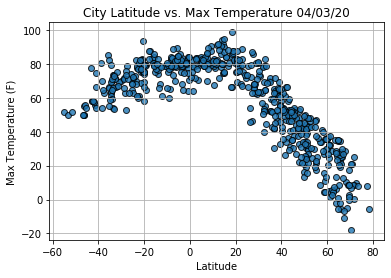

In [14]:
# Import time
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

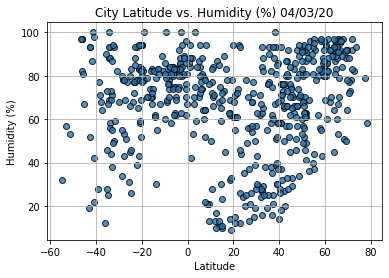

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
           humidity, 
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show the plot
plt.show()

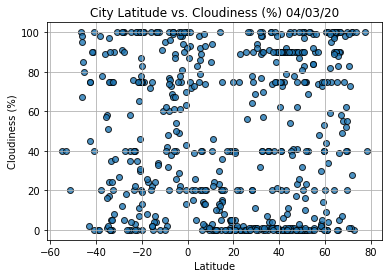

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
           cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

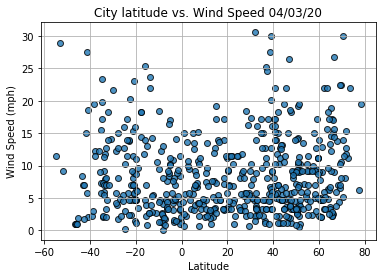

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
           wind_speed, 
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather
# and plot a regression line and the equation with the date
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values, edgecolor = 'black', linewidths = 1, alpha = 0.8)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'Slope = {slope}, Intercept = {intercept}, r-value = {r_value}, p-value = {p_value}, Standard Error = {std_err}')

In [19]:
# Testing out df.loc
index13 = city_data_df.loc[13]
index13

City                       Olivet
Country                        FR
Date          2020-04-03 20:42:50
Lat                         47.86
Lng                           1.9
Max Temp                       52
Humidity                       66
Cloudiness                     41
Wind Speed                   1.12
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

In [21]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Aklavik,CA,2020-04-03 20:42:45,68.22,-135.01,10.40,51,75,6.93
7,Yeniseysk,RU,2020-04-03 20:42:47,58.45,92.17,26.71,96,3,5.03
8,Arlit,NE,2020-04-03 20:42:47,18.74,7.39,87.75,9,4,7.11
10,Kapaa,US,2020-04-03 20:42:48,22.08,-159.32,78.80,74,1,11.41
13,Olivet,FR,2020-04-03 20:42:50,47.86,1.90,52.00,66,41,1.12


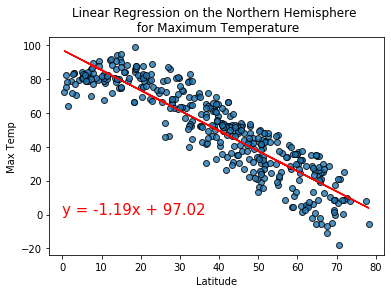

Slope = -1.191551489360323, Intercept = 97.02308433867817, r-value = -0.9010357037890577, p-value = 6.394876330091015e-140, Standard Error = 0.029424793397532508


In [22]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (0, 0))

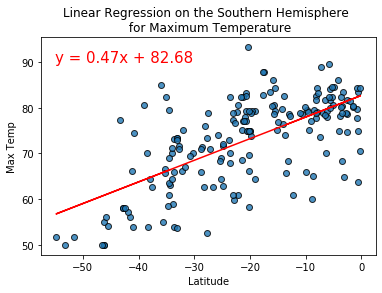

Slope = 0.4729461275474288, Intercept = 82.68187145419434, r-value = 0.6595447967963947, p-value = 5.752229252016559e-25, Standard Error = 0.03941586393151585


In [30]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-55, 90))

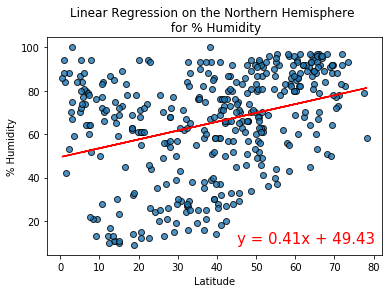

Slope = 0.40673669646470717, Intercept = 49.43421295873483, r-value = 0.33331533616397346, p-value = 2.3034376268892344e-11, Standard Error = 0.05901914747975539


In [31]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45, 10))

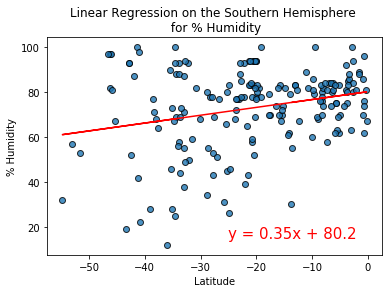

Slope = 0.3487850887804225, Intercept = 80.20081965801862, r-value = 0.25857947288056493, p-value = 0.00032740437306414045, Standard Error = 0.0952830577434256


In [33]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-25, 15))

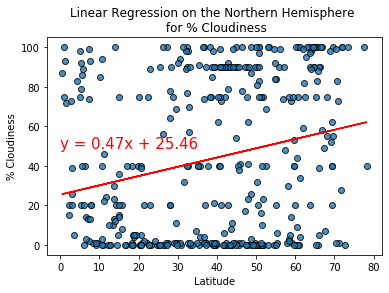

Slope = 0.4684529297161335, Intercept = 25.464442806508526, r-value = 0.2327652733278897, p-value = 4.270778533597404e-06, Standard Error = 0.10040614550523419


In [35]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (0, 49))

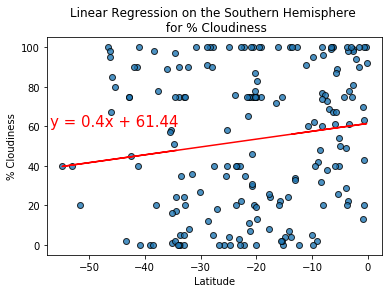

Slope = 0.39663541592290297, Intercept = 61.441952819752956, r-value = 0.14888069573606708, p-value = 0.04089410980054112, Standard Error = 0.19264821251324077


In [39]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-57, 60))

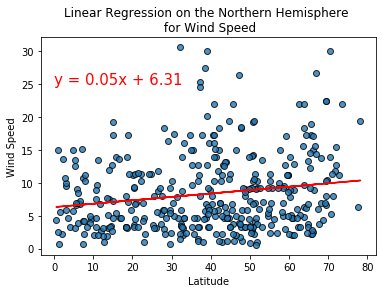

Slope = 0.05174163561007622, Intercept = 6.310418027143813, r-value = 0.17560875013037255, p-value = 0.0005651227276853257, Standard Error = 0.014879909664735907


In [40]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (0, 25))

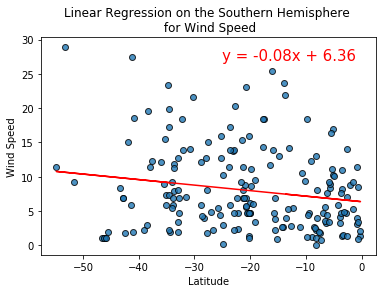

Slope = -0.08049709796419094, Intercept = 6.360275954422561, r-value = -0.1790831994097086, p-value = 0.013677642113291831, Standard Error = 0.03233898413746511


In [42]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-25, 27))